Our clustering analysis found several potential factors for clustering the data however the main source of distinction appears to be Total Spending. Certain interests such as photography or Camping offer some insight as well just not as powerful. The total time spent on this project was around 5 hours.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#adding seaborn
import seaborn as sns

In [5]:
data = pd.read_csv('Customer_Data.csv')

In [6]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
data

,Gender,Age,Annual Income,Total Spending,Interests
0,male,22.0,16.0,512.50,Cooking
1,male,34.0,12.0,358.75,Exercise
2,male,64.0,13.0,153.75,Travel
3,male,70.0,13.0,717.50,Crafts
4,female,58.0,22.0,820.00,Travel
...,...,...,...,...,...
1595,male,33.0,88.0,3228.75,Entertainment
1596,male,33.0,81.0,3741.25,Technology
1597,female,34.0,70.0,3997.50,Reading
1598,female,25.0,39.0,3433.75,Entertainment


# EDA

female    812
male      788
Name: Gender, dtype: int64

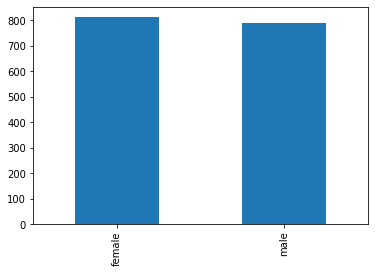

In [8]:
# Examine Gender variable
data['Gender'].value_counts().plot(kind='bar')

data['Gender'].value_counts()

#### There is a relatively even balance between male and female patients.

Entertainment      139
Hiking             137
Travel             132
Reading            131
Yoga               116
Crafts             115
Camping            108
Technology         102
Photography         98
Exercise            97
Music               92
Art                 88
Gaming              71
Strategic games     57
Sports              37
Automobiles         28
Pets                28
Cooking             19
Gardening            5
Name: Interests, dtype: int64

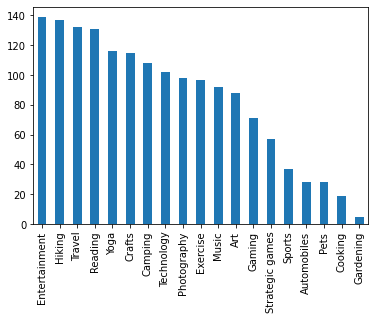

In [9]:
# Examine Interests variable
data['Interests'].value_counts().plot(kind='bar')

data['Interests'].value_counts()

Text(0.5, 0, 'Total Spending')

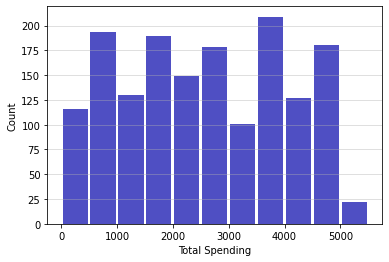

In [10]:
# Examine Total Spending
plt.hist(data['Total Spending'], bins=np.arange(0, 6000, 500), rwidth=0.9, alpha=0.7, color='#0504aa')
plt.grid(axis='y', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Total Spending')

In [11]:
# Examine Age variable
data['Age'].unique()

array([ 22.,  34.,  64.,  70.,  58., 250.,  48.,  55.,  65.,  51.,  43.,
        60.,  47.,  20.,  45.,  17.,  25.,  41.,  38.,  30.,  33.,  53.,
        56.,  63.,  39.,  27.,  62.,  54.,  44.,  37.,  35.,  21.,  32.,
        16.,  15.,  46.,  19.,  42.,  57.,  23.,  29.,  66.,  52.,  49.,
        67.,  71.,  59.,  61.,  50.,  18.,  24.,  31.,  28.,  26.,  36.,
        69.,  40.,  nan, 350.,  68.,  72.,  14.,  73.])

#### From looking at the age values we can see that there are values that need to be dealt with such as nan, 250, and 350.

In [12]:
data.describe()

,Age,Annual Income,Total Spending
count,1598.000000,1596.000000,1600.000000
mean,37.895494,187.129699,2575.600781
std,16.226009,5004.797654,1453.083432
min,14.000000,-100.000000,-102.500000
25%,28.000000,39.000000,1383.750000
50%,35.000000,65.000000,2511.250000
75%,47.000000,81.000000,3843.750000
max,350.000000,200000.000000,5176.250000


#### There is a negative minimum annual income which does not make sense and needs to be addressed. Likewise, there is a negative minimum total spending which also does not make sense unless there was a debit of some kind. The max income is also too large.

In [13]:
data.isnull().sum()

Gender            0
Age               2
Annual Income     4
Total Spending    0
Interests         0
dtype: int64

#### There are 6 missing values total so we need to address these.

In [14]:
# Drop the missing values
data.dropna(inplace=True)

In [15]:
m = data.drop(['Gender', 'Interests'], axis=1)
j = np.where(m < 1)

data.iloc[j[0]]

,Gender,Age,Annual Income,Total Spending,Interests
22,female,30.0,78.0,-102.50,Strategic games
42,female,37.0,82.0,-51.25,Travel
44,female,35.0,78.0,-51.25,Music
143,male,35.0,80.0,0.00,Automobiles
173,female,32.0,79.0,0.00,Hiking
278,male,37.0,76.0,-51.25,Technology
940,female,58.0,-100.0,2408.75,Pets
1090,male,34.0,0.0,5022.50,Travel


#### These values all seem suspicious so we will drop them

In [16]:
#data.drop([22, 42, 44, 143, 173, 278, 940, 1090], inplace=True)
# remove the line above, using a more pythonic way:
data.drop(data.iloc[j[0]].index, inplace = True) 

In [17]:
m = data.drop(['Gender', 'Interests'], axis=1)

j = np.where(m < 1)

data.iloc[j[0]]

,Gender,Age,Annual Income,Total Spending,Interests


#### All of the suspicious values were successfully dropped

#### Drop the misformatted income row

In [18]:
data.drop(data[data['Annual Income'] == data['Annual Income'].max()].index, inplace=True)

In [19]:
#data.drop(data[data['Age'] == 350].index, inplace=True)

In [20]:
#data.drop(data[data['Age'] == 250].index, inplace=True)
#removing the above 2 lines, using 1 line:
data.drop(data[data['Age'] >= 250].index, inplace = True) 

Now the data needs to be transformed so that we can use a clustering algorithm

# Clustering

In [21]:
# One-hot encode categorical variables

one_hot = pd.get_dummies(data['Gender'])
data.drop('Gender', inplace=True, axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Interests'])
data.drop('Interests', inplace=True, axis=1)
data = data.join(one_hot)

data

,Age,Annual Income,Total Spending,female,male,Art,Automobiles,Camping,Cooking,Crafts,...,Hiking,Music,Pets,Photography,Reading,Sports,Strategic games,Technology,Travel,Yoga
0,22.0,16.0,512.50,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,12.0,358.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64.0,13.0,153.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,70.0,13.0,717.50,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58.0,22.0,820.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,33.0,88.0,3228.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,33.0,81.0,3741.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1597,34.0,70.0,3997.50,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1598,25.0,39.0,3433.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


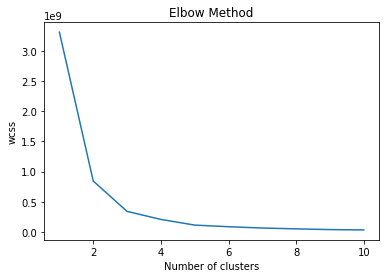

In [22]:
# Find ideal # of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
#Fitting kmeans to the dataset with k=3
km3=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = km3.fit_predict(data)

values, counts = np.unique(list(labels), return_counts=True)
print(values,counts)

[0 1 2] [559 565 459]


In [24]:
data['Cluster'] = labels

data

,Age,Annual Income,Total Spending,female,male,Art,Automobiles,Camping,Cooking,Crafts,...,Music,Pets,Photography,Reading,Sports,Strategic games,Technology,Travel,Yoga,Cluster
0,22.0,16.0,512.50,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
1,34.0,12.0,358.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,64.0,13.0,153.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,70.0,13.0,717.50,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,58.0,22.0,820.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,33.0,88.0,3228.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,33.0,81.0,3741.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1597,34.0,70.0,3997.50,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1598,25.0,39.0,3433.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


No handles with labels found to put in legend.


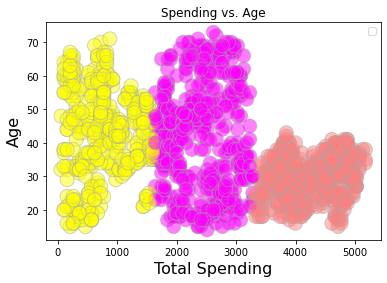

In [25]:
plt.scatter(data['Total Spending'], data['Age'], 
           c = data['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
plt.xlabel('Total Spending', 
              fontsize = 16)
plt.ylabel('Age', 
              fontsize = 16)
plt.title('Spending vs. Age')
plt.legend()

No handles with labels found to put in legend.


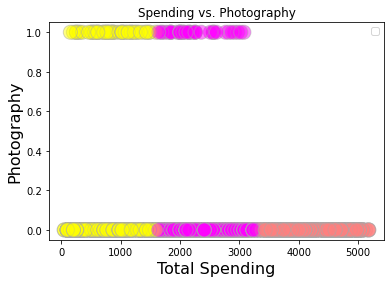

In [26]:
plt.scatter(data['Total Spending'], data['Photography'], 
           c = data['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
plt.xlabel('Total Spending', 
              fontsize = 16)
plt.ylabel('Photography', 
              fontsize = 16)
plt.title('Spending vs. Photography')
plt.legend()

Text(0.5, 0, 'Age')

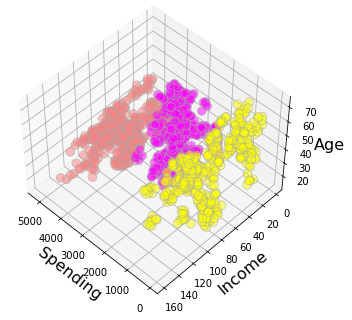

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(data['Total Spending'], data['Annual Income'], data['Age'], 
           c = data['Cluster'],
           s = 75,
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Spending', 
              fontsize = 16)
ax.set_ylabel('Income', 
              fontsize = 16)
ax.set_zlabel('Age', 
              fontsize = 16)

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data.groupby('Cluster').mean())

,Age,Annual Income,Total Spending,female,male,Art,Automobiles,Camping,Cooking,Crafts,Entertainment,Exercise,Gaming,Gardening,Hiking,Music,Pets,Photography,Reading,Sports,Strategic games,Technology,Travel,Yoga
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,41.166369,54.481216,2390.322004,0.516995,0.483005,0.060823,0.041145,0.087657,0.012522,0.064401,0.053667,0.062612,0.057245,0.00000,0.067979,0.046512,0.037567,0.069767,0.098390,0.051878,0.039356,0.039356,0.050089,0.059034
1,29.842478,65.355752,4219.553097,0.522124,0.477876,0.084956,0.000000,0.015929,0.000000,0.044248,0.148673,0.023009,0.023009,0.00885,0.077876,0.099115,0.000000,0.000000,0.067257,0.000000,0.017699,0.123894,0.138053,0.127434
2,42.699346,66.830065,812.184096,0.477124,0.522876,0.013072,0.008715,0.106754,0.026144,0.117647,0.052288,0.104575,0.056645,0.00000,0.117647,0.013072,0.013072,0.126362,0.080610,0.017429,0.052288,0.019608,0.052288,0.021786


### Try clustering with 4 clusters

In [29]:
#Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = km4.fit_predict(data)

values, counts = np.unique(list(labels), return_counts=True)
print(values,counts)

[0 1 2 3] [348 355 524 356]


In [30]:
data['Cluster'] = labels

data

,Age,Annual Income,Total Spending,female,male,Art,Automobiles,Camping,Cooking,Crafts,...,Music,Pets,Photography,Reading,Sports,Strategic games,Technology,Travel,Yoga,Cluster
0,22.0,16.0,512.50,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,34.0,12.0,358.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,64.0,13.0,153.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,70.0,13.0,717.50,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,58.0,22.0,820.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,33.0,88.0,3228.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,33.0,81.0,3741.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1597,34.0,70.0,3997.50,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1598,25.0,39.0,3433.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data.groupby('Cluster').mean())

,Age,Annual Income,Total Spending,female,male,Art,Automobiles,Camping,Cooking,Crafts,Entertainment,Exercise,Gaming,Gardening,Hiking,Music,Pets,Photography,Reading,Sports,Strategic games,Technology,Travel,Yoga
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,39.508621,54.862069,2839.220546,0.491379,0.508621,0.083333,0.043103,0.057471,0.000000,0.054598,0.071839,0.048851,0.054598,0.000000,0.043103,0.077586,0.040230,0.037356,0.071839,0.057471,0.040230,0.054598,0.071839,0.091954
1,42.816901,67.123944,630.880282,0.504225,0.495775,0.014085,0.008451,0.101408,0.030986,0.126761,0.042254,0.109859,0.053521,0.000000,0.107042,0.014085,0.014085,0.132394,0.084507,0.014085,0.047887,0.019718,0.053521,0.025352
2,30.148855,65.540076,4279.961832,0.524809,0.475191,0.087786,0.000000,0.017176,0.000000,0.038168,0.150763,0.020992,0.024809,0.009542,0.080153,0.095420,0.000000,0.000000,0.064885,0.000000,0.019084,0.125954,0.135496,0.129771
3,41.362360,58.404494,1793.030197,0.500000,0.500000,0.022472,0.025281,0.117978,0.022472,0.087079,0.053371,0.081461,0.056180,0.000000,0.115169,0.016854,0.022472,0.103933,0.115169,0.033708,0.042135,0.025281,0.042135,0.016854


No handles with labels found to put in legend.


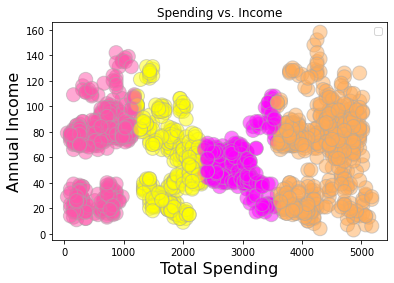

In [35]:
plt.scatter(data['Total Spending'], data['Annual Income'], 
           c = data['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
plt.xlabel('Total Spending', 
              fontsize = 16)
plt.ylabel('Annual Income', 
              fontsize = 16)
plt.title('Spending vs. Income')
plt.legend()

Text(0.5, 0, 'Age')

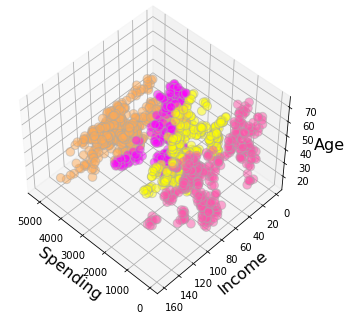

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(data['Total Spending'], data['Annual Income'], data['Age'], 
           c = data['Cluster'],
           s = 75,
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Spending', 
              fontsize = 16)
ax.set_ylabel('Income', 
              fontsize = 16)
ax.set_zlabel('Age', 
              fontsize = 16)

__________________________________________________________________________________________________________________________

In [82]:
# using only Total_Spending and income variable for this visualisation
X = data.iloc[:, [1, 2]].values

In [83]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


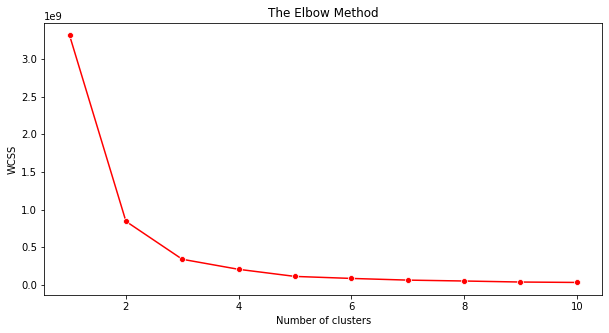

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

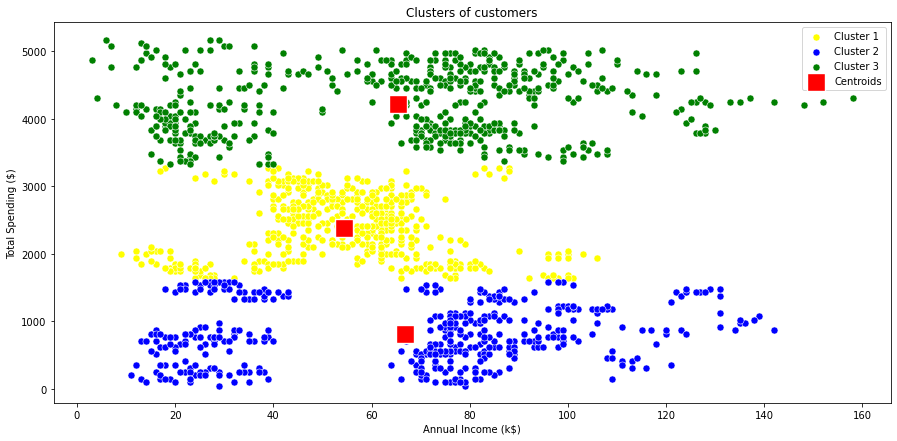

In [86]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Total Spending ($)')
plt.legend()
plt.show()